Dataset Explanation

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load Dataset
file_path = "classification.csv"
df = pd.read_csv(file_path)

# Display dataset information and preview
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [47]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Dataset Explanation**

This dataset appears to be a binary classification dataset where the goal is to predict a categorical outcome (y) based on various demographic and economic factors.

**Dataset Structure**
1. Number of Rows: 48,842
2. Number of Columns: 11
3. Target Variable: y (Binary: 0 or 1)
4. Feature Variables (Categorical):
* hours_per_week_bin: Categorized work hours per week.
* occupation_bin: Grouped occupation levels.
* msr_bin: Economic or marital status classification.
* capital_gl_bin: Categorized capital gain/loss.
* race_sex_bin: Combined race and gender category.
* education_num_bin: Grouped education years.
* education_bin: Education level classification.
* workclass_bin: Type of work category.
* age_bin: Age grouped into bins.
* flag: Indicates training (train) or test (test) set.

Classification Tasks: The goal of the classification model (Logistic/Probit Regression) is to predict y, which is a binary label (0 or 1). What are we classifying? We are predicting whether an individual earns more than 50K per year based on demographic and work-related factors.

Data preparation

In [48]:
# Data Preparation
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

# Split dataset into train and test
y_train = df[df['flag']=='train']['y']
x_train = df[df['flag']=='train'][cat_feats]
x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

print(x_train.shape)
print(x_train.head())

y_test = df[df['flag']=='test']['y']
x_test = df[df['flag']=='test'][cat_feats]
x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

# Convert to numpy arrays
x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

# Apply manual feature scaling
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean_train) / std_train
x_test_scaled = (x_test - mean_train) / std_train


(32561, 22)
   age_bin_b. 26-30 & 71-100  age_bin_c. 31-35 & 61-70  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                       True                     False   

   age_bin_d. 36-40 & 56-60  age_bin_e. 40-55  capital_gl_bin_b. < 0  \
0                      True             False                  False   
1                     False              True                  False   
2                      True             False                  False   
3                     False              True                  False   
4                     False             False                  False   

   capital_gl_bin_c. > 0  education_bin_b. Mid  education_bin_c. Bachelors  \
0                   True                 False                        True   
1                  False                 False    

In [67]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("y_train distribution:")
for label, count in zip(unique_train, counts_train):
    print(f"class {label}: {count} samples")

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\ny_test distribution:")
for label, count in zip(unique_test, counts_test):
    print(f"class {label}: {count} samples")

y_train distribution:
class 0: 24720 samples
class 1: 7841 samples

y_test distribution:
class 0: 12435 samples
class 1: 3846 samples


Assignment

In [49]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=3000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        n_festures = X.shape[1]
        self.weights = np.zeros(n_festures)
        self.bias = self.bias
        with tqdm(total=self.iterations) as pbar:
            for i in range(self.iterations):
                linear_model = np.dot(X, self.weights) + self.bias # z = w1*x1 + w2*x2 + ... + wN*xN + b
                y_predicted = self.sigmoid(linear_model)
                
                # Logistic Regression Loss: E = -Σ (t_n * log(y_n) + (1 - t_n) * log(1 - y_n)) 
                loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
                
                # Update weight: ∇E(w) = Σ (y_n - t_n) * φ_n）
                dw = np.dot(X.T, (y_predicted - y)) / n_samples
                db = np.sum(y_predicted - y) / n_samples
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                pbar.set_postfix(loss=f"{loss:.4f}")
                pbar.update(1) 
            
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return proba >= threshold


In [50]:
# Train Models
lr_scratch = LogisticRegressionScratch(learning_rate=0.1, iterations=3000)
lr_scratch.fit(x_train_scaled, y_train)

100%|██████████| 3000/3000 [00:07<00:00, 422.68it/s, loss=0.3338]


In [51]:
# Compute Confusion Matrices
def compute_confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positive
    TN = np.sum((y_true == 0) & (y_pred == 0)) # True Negative
    FP = np.sum((y_true == 0) & (y_pred == 1)) # False Positive
    FN = np.sum((y_true == 1) & (y_pred == 0)) # False Negative
    
    return np.array([[TN, FP],
                     [FN, TP]])

[[11605   830]
 [ 1681  2165]]


<Axes: >

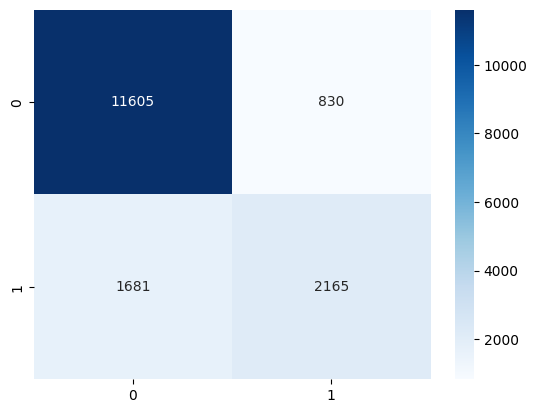

In [52]:
# Predictions
y_pred_lr = lr_scratch.predict(x_test_scaled)
y_prob_lr = lr_scratch.predict_proba(x_test_scaled)
cm_lr = compute_confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')

In [53]:
accuracy_lr = (cm_lr[0, 0] + cm_lr[1, 1]) / np.sum(cm_lr)
print(f"Accuracy: {accuracy_lr}")
precision_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[0, 1])
print(f"Precision: {precision_lr}")
recall_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[1, 0])
print(f"Recall: {recall_lr}")
f_score = 2 * precision_lr * recall_lr / (precision_lr + recall_lr)
print(f"F1-Score: {f_score}")

Accuracy: 0.845771144278607
Precision: 0.7228714524207012
Recall: 0.5629225169006761
F1-Score: 0.6329483993568191


In [58]:

# Compute ROC Curves and AUC
def compute_roc_curve(y_true, y_scores, thresholds=None):
    if thresholds is None:
        thresholds = np.linspace(0, 1, 100)

    tpr_list = []
    fpr_list = []

    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        cm = compute_confusion_matrix(y_true, y_pred)
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TP = cm[1, 1]
        
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    return np.array(fpr_list), np.array(tpr_list)

def compute_auc(fpr, tpr):
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]

    auc = np.trapezoid(y=tpr, x=fpr)
    print(f"AUC: {auc}")
    return auc


AUC: 0.8976706434562167


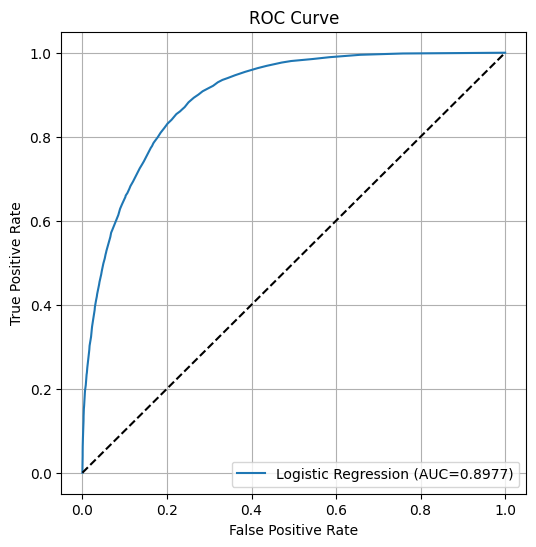

In [59]:
fpr_lr, tpr_lr = compute_roc_curve(y_test, y_prob_lr)
auc_lr = compute_auc(fpr_lr, tpr_lr)

# Plot ROC Curves
def plot_roc_curve(fpr_lr, tpr_lr, auc_lr):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.4f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()
plot_roc_curve(fpr_lr, tpr_lr, auc_lr)

In [61]:
def try_different_hyperparameter(learning_rate=0.01, iterations=3000, threshold=0.5):
    # Train Models
    lr_scratch = LogisticRegressionScratch(learning_rate=learning_rate, iterations=iterations)
    lr_scratch.fit(x_train_scaled, y_train)
    
    # Predictions
    y_pred_lr = lr_scratch.predict(x_test_scaled, threshold=threshold)
    y_prob_lr = lr_scratch.predict_proba(x_test_scaled) 
    
    # Evaluate Model
    cm_lr = compute_confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
    
    accuracy_lr = (cm_lr[0, 0] + cm_lr[1, 1]) / np.sum(cm_lr)
    print(f"Accuracy: {accuracy_lr}")
    precision_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[0, 1])
    print(f"Precision: {precision_lr}")
    recall_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[1, 0])
    print(f"Recall: {recall_lr}")
    f_score = 2 * precision_lr * recall_lr / (precision_lr + recall_lr)
    print(f"F1-Score: {f_score}")
    
    # Compute ROC Curves and AUC
    fpr_lr, tpr_lr = compute_roc_curve(y_test, y_prob_lr)
    auc_lr = compute_auc(fpr_lr, tpr_lr)
    plot_roc_curve(fpr_lr, tpr_lr, auc_lr)

# Assignment

100%|██████████| 3000/3000 [00:07<00:00, 415.47it/s, loss=0.3464]


Accuracy: 0.8430686075793871
Precision: 0.7208347588094424
Recall: 0.5478419136765471
F1-Score: 0.6225439503619442
AUC: 0.8910332689946119


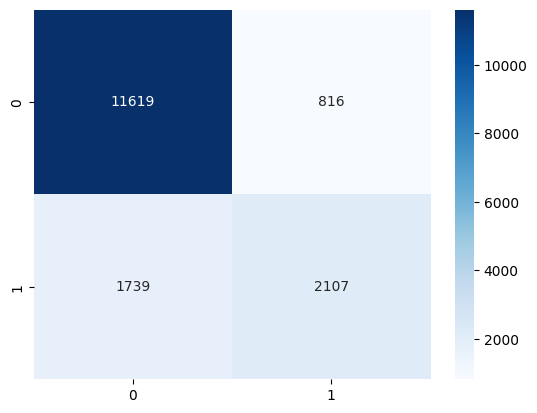

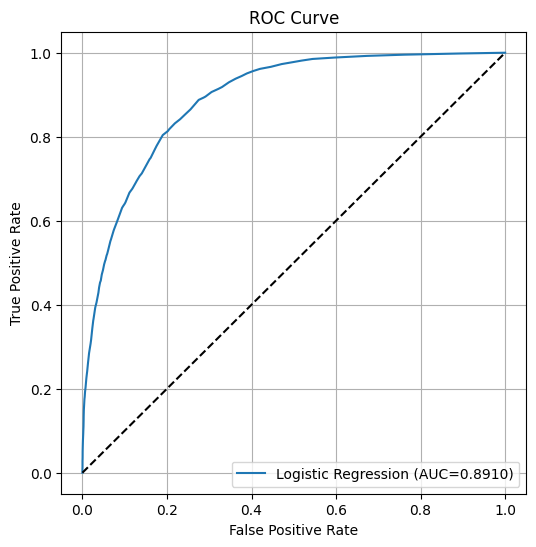

In [62]:
try_different_hyperparameter(learning_rate=0.01, iterations=3000, threshold=0.5)

100%|██████████| 3000/3000 [00:08<00:00, 374.56it/s, loss=0.3464]


Accuracy: 0.8360051593882439
Precision: 0.647
Recall: 0.6729069162766511
F1-Score: 0.6596992097884273
AUC: 0.8910332689946119


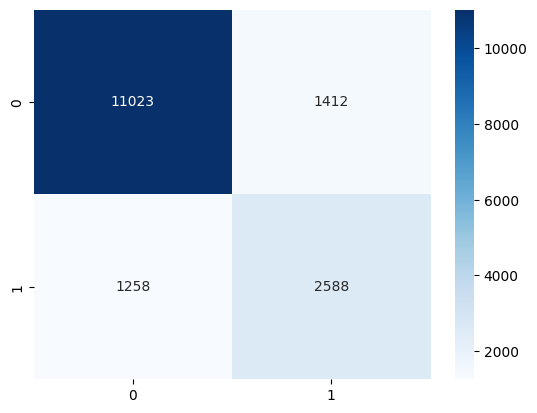

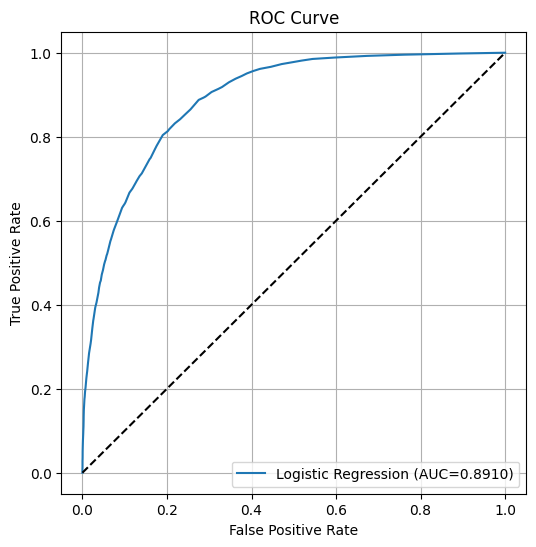

In [ ]:
# lower threshold
try_different_hyperparameter(learning_rate=0.01, iterations=3000, threshold=0.4)

100%|██████████| 3000/3000 [00:08<00:00, 370.02it/s, loss=0.6374]


Accuracy: 0.7946686321479025
Precision: 0.5501895829175814
Recall: 0.7168486739469578
F1-Score: 0.6225584283617478
AUC: 0.8638321142013352


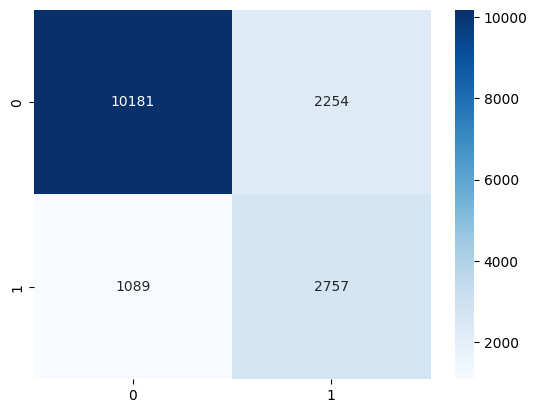

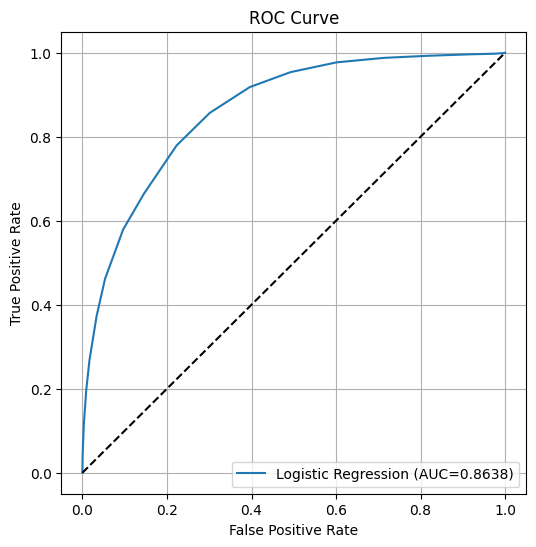

In [63]:
try_different_hyperparameter(learning_rate=0.0001, iterations=3000, threshold=0.5)

100%|██████████| 1000/1000 [00:02<00:00, 409.38it/s, loss=0.5540]


Accuracy: 0.8074442601805786
Precision: 0.57716518341654
Recall: 0.6913676547061882
F1-Score: 0.6291257541701171
AUC: 0.8689358977656251


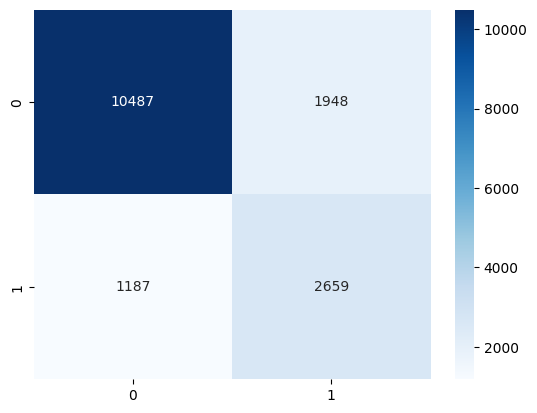

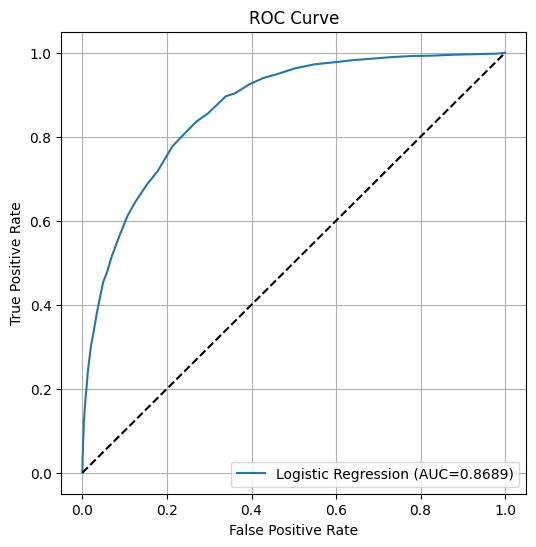

In [64]:
try_different_hyperparameter(learning_rate=0.001, iterations=1000, threshold=0.5)

In [57]:
# # Archived
# # Probit Regression from Scratch
# class ProbitRegressionScratch:
#     def __init__(self, learning_rate=0.01, iterations=3000):
#         pass

#     def fit(self, X, y):
#         pass

#     def predict_proba(self, X):
#         pass

#     def predict(self, X, threshold=0.5):
#         pass

# pr_scratch = ProbitRegressionScratch()
# pr_scratch.fit(x_train, y_train)

# y_pred_pr = pr_scratch.predict(x_test)
# y_prob_pr = pr_scratch.predict_proba(x_test)

# cm_pr = compute_confusion_matrix(y_test, y_pred_pr)
# fpr_pr, tpr_pr = compute_roc_curve(y_test, y_prob_pr)
# auc_pr = compute_auc(fpr_pr, tpr_pr)
